
## 01MIAR - Actividad Video Valencia Pollution

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 29/11/2024 00:00 - 29/11/2024 23:59

#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- parámetros: parámetroe medidos
- mediciones: fichero de mediciones
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire
- fiwareid: 
- geo_shape: coordenadas geográficas
- geo_point_2d: latitud-longitud

In [73]:
# Your imports here...
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 01
Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame

In [2]:
# Your solution here...
csv_path="valencia_pollution_dataset.csv"
dataframe=pd.read_csv(csv_path, sep=",")
display(dataframe.sample(5))
dataframe.info()

,objectid,nombre,direccion,tipozona,parametros,mediciones,so2,no2,o3,co,pm10,pm25,tipoemision,fecha_carga,calidad_ambiental,fiwareid,geo_shape,geo_point_2d
248,28,Viveros,Jardines de Viveros,Urbana,NaN,NaN,0.0,5,89.0,NaN,NaN,NaN,Fondo,2025-05-25T21:20:10+00:00,Razonablemente Buena,NaN,NaN,NaN
17,430,Dr. Lluch,"Calle Dr. Lluch, 48",Urbana,NaN,NaN,NaN,4,NaN,NaN,24.0,9.0,Tráfico,2025-05-24T23:20:11+00:00,Razonablemente Buena,NaN,NaN,NaN
310,27,Universidad Politécnica,Campus de la U. Politécnica. Avda. Tarongers,Suburbana,NaN,NaN,2.0,3,74.0,NaN,18.0,13.0,Fondo,2025-05-26T03:20:09+00:00,Razonablemente Buena,NaN,NaN,NaN
79,23,Francia,"Avda. de Francia, 60",Urbana,NaN,NaN,0.0,3,76.0,0.1,7.0,5.0,Tráfico,2025-05-25T06:20:06+00:00,Razonablemente Buena,NaN,NaN,NaN
34,27,Universidad Politécnica,Campus de la U. Politécnica. Avda. Tarongers,Suburbana,NaN,NaN,2.0,3,83.0,NaN,18.0,14.0,Fondo,2025-05-25T01:20:08+00:00,Razonablemente Buena,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   objectid           396 non-null    int64  
 1   nombre             396 non-null    object 
 2   direccion          396 non-null    object 
 3   tipozona           396 non-null    object 
 4   parametros         0 non-null      float64
 5   mediciones         0 non-null      float64
 6   so2                216 non-null    float64
 7   no2                396 non-null    int64  
 8   o3                 216 non-null    float64
 9   co                 108 non-null    float64
 10  pm10               288 non-null    float64
 11  pm25               288 non-null    float64
 12  tipoemision        396 non-null    object 
 13  fecha_carga        396 non-null    object 
 14  calidad_ambiental  396 non-null    object 
 15  fiwareid           0 non-null      float64
 16  geo_shape          0 non-n

## 02
 - **¿Cuál es el rango temporal del dataset?**

Para tener un mejor resultado se normaliza las zonas horarias del dataset, colocando todas en un mismo uso horario. Esto se realiza con la función `normalize_timezone`

De manera posterior se calcula el máximo y mínimo de las fechas normalizadas para obtener la fecha de inicio y fin de las capturas realizadas. Para esto se usa la función get_rango temporal.


In [68]:
# Rango temporal del dataset
def normalize_timezone(fechas, tz="America/Guayaquil"):
    fechas_normalizadas= pd.to_datetime(fechas).dt.tz_convert(tz)
    return pd.Series(fechas_normalizadas)
    
    

def get_rango_temporal(fechas):
    rango_max=fechas.max()
    rango_min=fechas.min()
    print(rango_max)
    print(f"El rango temporal del dataset es: \nInicio: {rango_min}, Fin: {rango_max}")
    
fechas_normalize=normalize_timezone(dataframe["fecha_carga"])

get_rango_temporal(fechas_normalize)

2025-05-26 05:20:13-05:00
El rango temporal del dataset es: 
Inicio: 2025-05-24 15:20:04-05:00, Fin: 2025-05-26 05:20:13-05:00


**- Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono**

Se analiza `objectid`y `nombre` para identificar el campo que se puede utilizar para trabajar por estaciones:

In [27]:
"""display(dataframe[["nombre", "objectid"]].describe(include="all"))

def get_stations(names):
    stations=set(names)
    print(f"Existe un total de {len(stations)} estaciones")
    return stations

get_stations(dataframe["nombre"])

dataframe["nombre"].unique()
"""

co_stations=dataframe[dataframe["co"].isna()==False][["objectid", "nombre","co"]]

len(co_stations["nombre"].unique())

3

## 03

- Número de estación con la media más alta de mediciones de monóxido de carbono

In [47]:
# Your solution here...
co_station_means=co_stations.groupby("nombre").mean(numeric_only=True)
display(co_station_means)

print(f"La estación con la media más alta en mediciones de monóxido de carbono es:")
display(co_station_means["co"].idxmax())


,objectid,co
nombre,,
Francia,23.0,0.1
Molí del Sol,25.0,0.3
Pista de Silla,26.0,0.7


La estación con la media más alta en mediciones de monóxido de carbono es:


'Pista de Silla'

## 04
Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

<Axes: xlabel='no2', ylabel='Count'>

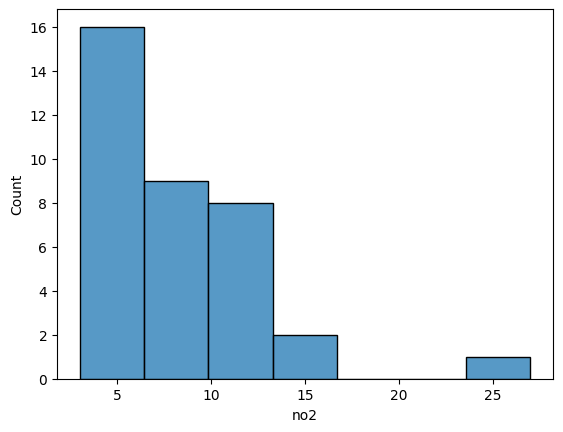

In [71]:
# Your solution here...
#no2_data=dataframe[dataframe["nombre"]=='Pista de Silla'][["objectid","nombre","no2", "fecha_carga"]]

#sns.histplot(data=no2_data, x="no2")

sns.histplot(data=dataframe[dataframe["nombre"]=="Pista de Silla"], x="no2")

## 05
Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

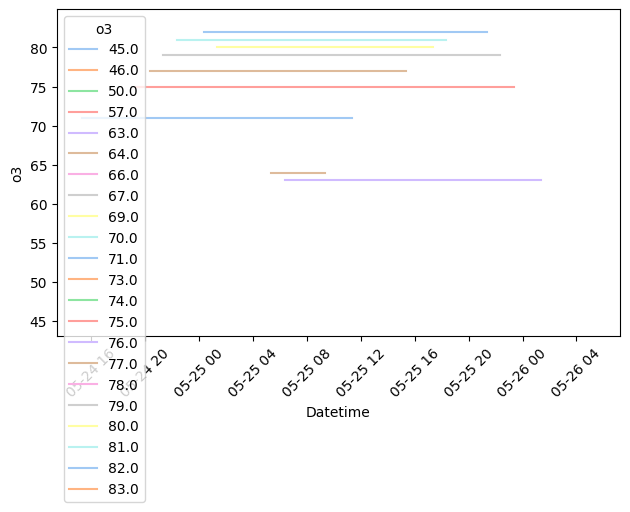

In [85]:
# Your solution here...
dataframe["fecha_carga"]=fechas_normalize
fig, axes= plt.subplots()
axes.set_xlabel("Datetime")
color=sns.color_palette()
sns.lineplot(data=dataframe[dataframe["nombre"]=="Pista de Silla"], 
             x="fecha_carga", 
             y="o3", 
             ax=axes,
             palette="pastel", hue="o3")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()